In [1]:
#Importing Necessary Libraries
#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Feature Selection Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# ML Libraries (Random Forest, Naive Bayes, SVM)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Read Iris Dataset into DataFrame & Print sample dataset
p1 = '/content/drive/MyDrive/Colab Notebooks/ML/Iris.csv'
df = pd.read_csv(p1, error_bad_lines=False)
df.head()

<ipython-input-3-d3086ed806df>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(p1, error_bad_lines=False)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Check if NA Exist
df.info()

#If no NA Exist, proceed
#df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Drop unusable Attributes: ID
#Reason: ID is the unique identifier that directly linked to each instance, which makes it not meaningful for training
df = df.drop(['Id'], axis=1)


In [6]:
#Display Target Class
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#Encode labels into categorical variables:
df['Species'] = pd.factorize(df["Species"])[0]
Target = 'Species'
df['Species'].unique()

array([0, 1, 2])

In [8]:
#Define Full Feature Set
Features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print('Full Features: ', Features)

Full Features:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [12]:
# Feature Selection using Recursive Feature Elimination
# Split Dataframe to target class and features
X_fs = df[Features]
Y_fs = df[Target]

# Feature Selection Model Fitting
model = LogisticRegression(solver='lbfgs', multi_class='auto')

#Mark the Number of Features to be selected, Adjust this Number to enhance the Model Performance
rfe = RFE(model)
fit = rfe.fit(X_fs, Y_fs)

print("Number of Features Selected : %s" % (fit.n_features_))
print("Feature Ranking             : %s" % (fit.ranking_))
print("Selected Features           : %s" % (fit.support_))

# At Current Point, the attributes is select manually based on Feature Selection Part.
Features = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Selected Features           :", Features)


Number of Features Selected : 2
Feature Ranking             : [3 2 1 1]
Selected Features           : [False False  True  True]
Selected Features           : ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [13]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target Class        :  Species
Training Set Size   :  (120, 5)
Test Set Size       :  (30, 5)


** Machine Learning Model **

In [14]:
# Gaussian Naive Bayes
# Create Model with configuration
nb_model = GaussianNB()

# Model Training
nb_model.fit(X=x1, y=x2)

# Prediction with Test Set
result= nb_model.predict(y[Features])

In [15]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Naive Bayes Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Naive Bayes Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


================= Classification Report =================

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


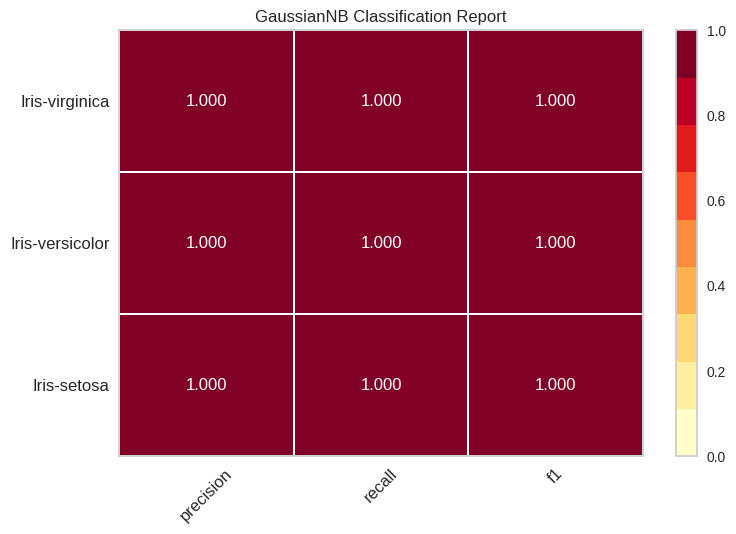

In [16]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = ClassificationReport(nb_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [17]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [18]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


================= Classification Report =================

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


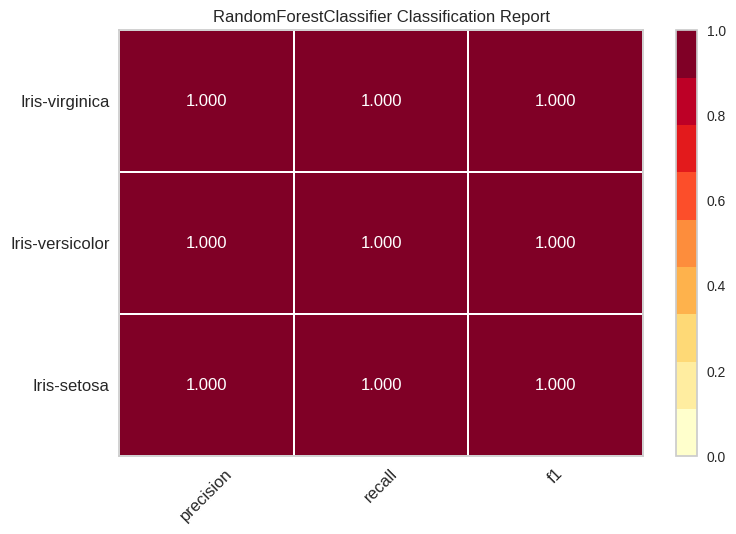

In [19]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [20]:
# Support Vector Machine
# Create Model with configuration
svm_model = SVC(kernel='linear')

# Model Training
svm_model.fit(X=x1, y=x2)

# Prediction
result = svm_model.predict(y[Features])

In [21]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= SVM Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= SVM Results =============
Accuracy    :  0.9666666666666667
Recall      :  0.9666666666666667
Precision   :  0.9696969696969696
F1 Score    :  0.9666666666666667
Confusion Matrix: 
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


================= Classification Report =================

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


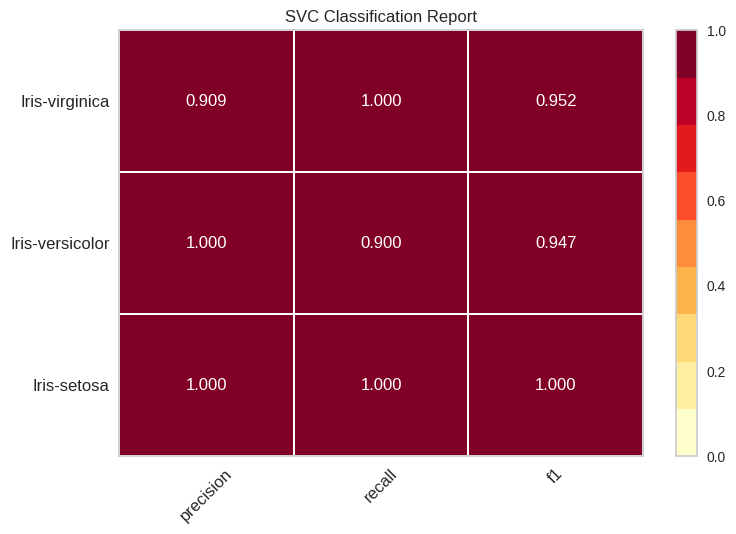

In [22]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = ClassificationReport(svm_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the Test Set

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [23]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('gnb', nb_model)],
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)

# Prediction
result = eclf1.predict(y[Features])

In [24]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


================= Classification Report =================

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


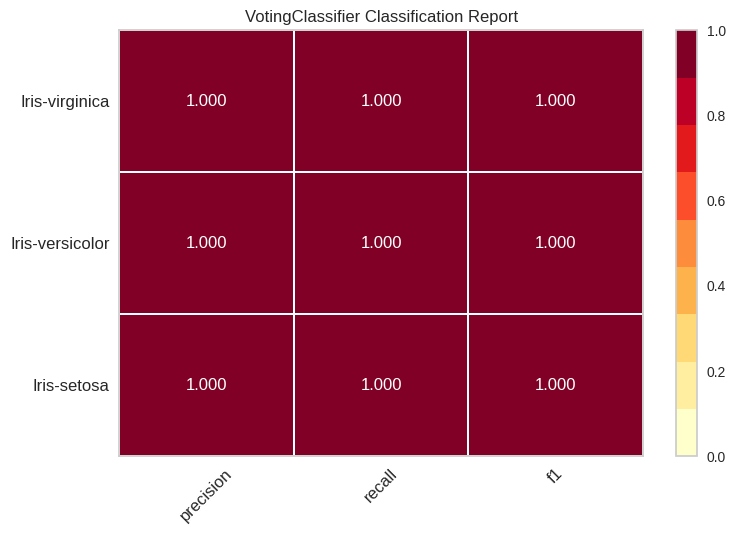

In [25]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data